In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

# Overview of our dataset

In [87]:
# Download the data of Davidson
url = "https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv"
df = pd.read_csv(url,index_col=0,parse_dates=[0],encoding='ISO-8859-1')

The data are stored as a CSV and as a pickled pandas dataframe (Python 2.7). Each data file contains 5 columns:

count = number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were determined to be unreliable by CF).

hate_speech = number of CF users who judged the tweet to be hate speech.

offensive_language = number of CF users who judged the tweet to be offensive.

neither = number of CF users who judged the tweet to be neither offensive nor non-offensive.

class = class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither

In [3]:
np.random.seed(42)
df.head(5)

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry?...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24783 entries, 0 to 25296
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.3+ MB


In [5]:
df["hate_speech"].value_counts()

0    19790
1     3419
2     1251
3      287
4       21
5        7
6        5
7        3
Name: hate_speech, dtype: int64

In [6]:
df["class"].value_counts() 
#1430 tweets considered as hateful content

1    19190
2     4163
0     1430
Name: class, dtype: int64

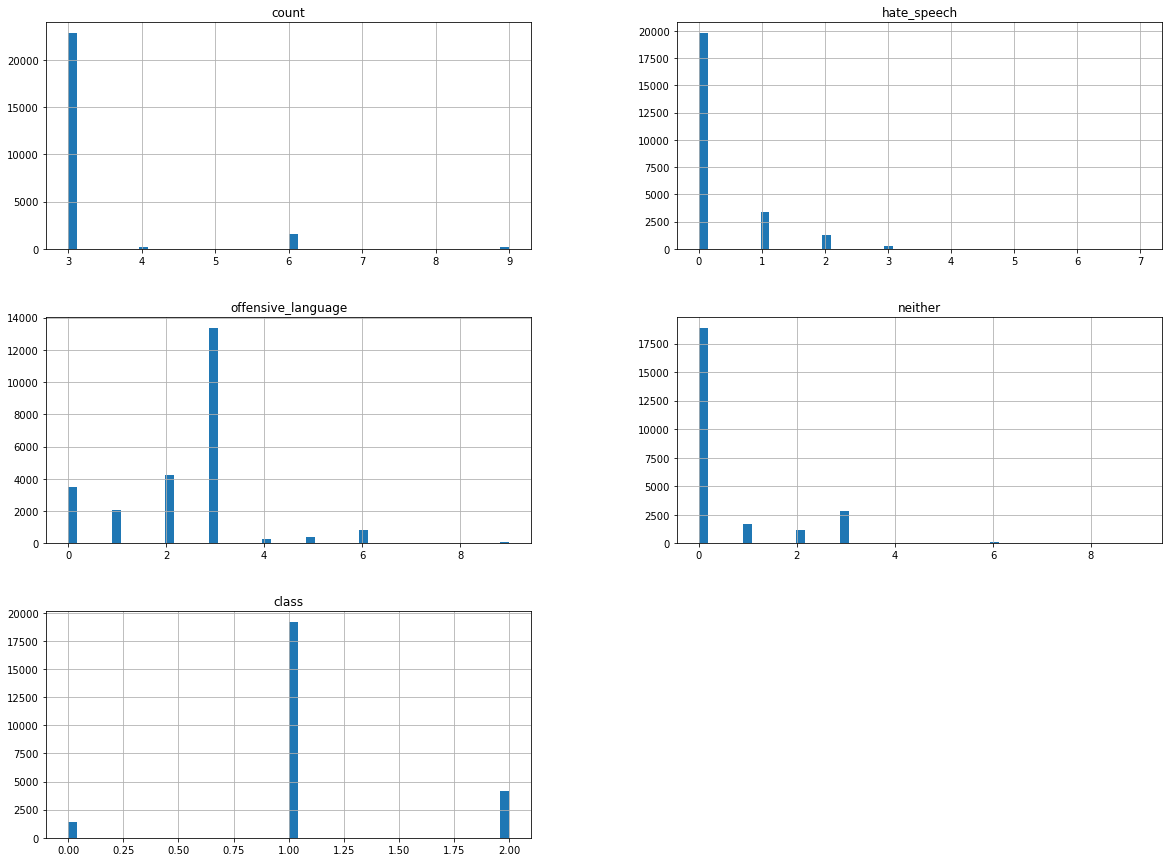

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
#No missing values
sample_incomplete_rows = df[df.isnull().any(axis=1)].head()
sample_incomplete_rows

,count,hate_speech,offensive_language,neither,class,tweet


In [90]:
df = df.drop(columns=['count','hate_speech','offensive_language','neither'])

# Visualization of our datasets

## Visualization of the most frequent words

In [10]:
conda install -c conda-forge wordcloud=1.6.0 

Solving environment: ...working... done

# All requested packages already installed.

Note: you may need to restart the kernel to use updated packages.



(-0.5, 399.5, 199.5, -0.5)

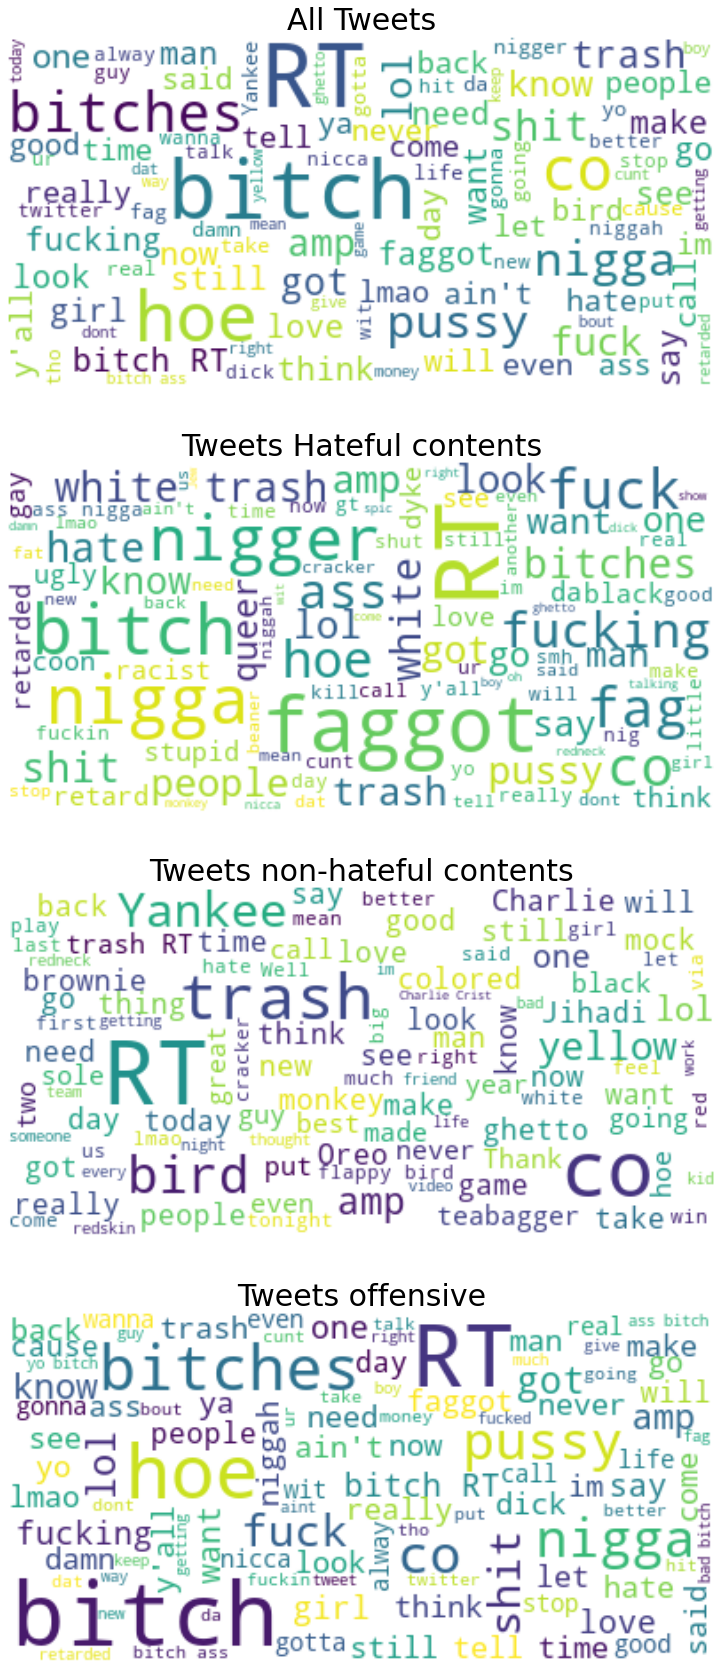

In [11]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Start with one review:
df_hateful = df[df['class']==0]
df_nonhateful = df[df['class']==2]
df_offensive = df[df['class']==1]
tweet_All = " ".join(review for review in df.tweet)
tweet_hateful = " ".join(review for review in df_hateful.tweet)
tweet_nonhateful = " ".join(review for review in df_nonhateful.tweet)
tweet_offensive = " ".join(review for review in df_offensive.tweet)

fig, ax = plt.subplots(4, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_hateful = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_hateful)
wordcloud_nonhateful = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_nonhateful)
wordcloud_offensive = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_offensive)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_hateful, interpolation='bilinear')
ax[1].set_title('Tweets Hateful contents',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_nonhateful, interpolation='bilinear')
ax[2].set_title('Tweets non-hateful contents',fontsize=30)
ax[2].axis('off')
ax[3].imshow(wordcloud_offensive, interpolation='bilinear')
ax[3].set_title('Tweets offensive',fontsize=30)
ax[3].axis('off')

In [12]:
# get a word count per sentence column
def word_count(sentence):
    return len(sentence.split())
    
df['word count'] = df['tweet'].apply(word_count)
df.head(3)

,class,tweet,word count
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...,25
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,16
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry?...,21


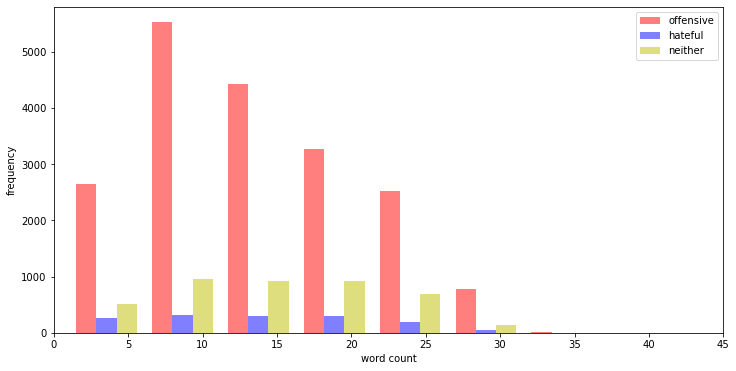

In [13]:
# plot word count distribution for both positive and negative sentiments
x = df['word count'][df['class'] == 1]
y = df['word count'][df['class']  == 0]
z = df['word count'][df['class']  == 2]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('word count')
plt.ylabel('frequency')
g = plt.hist([x, y,z], color=['r','b','y'], alpha=0.5, label=['offensive','hateful','neither'])
plt.legend(loc='upper right')

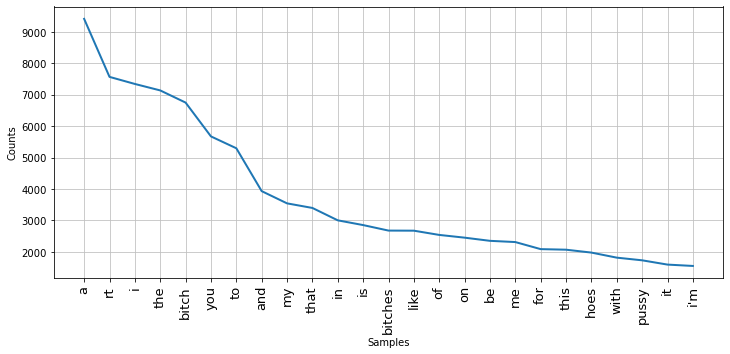

NameError: name 'Counter' is not defined

In [14]:
# most common words in twitter dataset
all_words = []
for line in list(df['tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)
# log-log of all words 

word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

We keep only hateful contents and tweets labelled as neither

In [88]:
df = df[df["class"] != 1]
df

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...
40,3,0,1,2,2,""" momma said no pussy cats inside my doghouse """
63,3,0,0,3,2,"""@Addicted2Guys: -SimplyAddictedToGuys http://t.co/1jL4hi8ZMF"" woof woof hot scally lad"
66,3,0,1,2,2,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woof woof and hot soles"
67,3,0,1,2,2,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these dishes."" One oreo? Lol"
...,...,...,...,...,...,...
25280,3,0,1,2,2,"you know what they say, the early bird gets the worm. *puts gummy worms in your morning coffee*"
25289,3,3,0,0,0,you're all niggers
25290,3,2,1,0,0,you're such a retard i hope you get type 2 diabetes and die from a sugar rush you fucking faggot...
25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, and drove me redneck crazy"


# Cleaning the tweets

## 1. Ekphrasis

In [ ]:
https://www.kaggle.com/chengham/succinct-baseline
https://github.com/cbaziotis/ekphrasis/blob/master/ekphrasis/examples/word_segmentation.ipynb

ekphrasis offers the following functionality:

Social Tokenizer. A text tokenizer geared towards social networks (Facebook, Twitter...), which understands complex emoticons, emojis and other unstructured expressions like dates, times and more.

Word Segmentation. You can split a long string to its constituent words. Suitable for hashtag segmentation.

Spell Correction. You can replace a misspelled word, with the most probable candidate word.

Customization. Taylor the word-segmentation, spell-correction and term identification, to suit your needs.

Pre-Processing Pipeline. You can combine all the above steps in an easy way, in order to prepare the text files in your dataset for some kind of analysis or for machine learning. In addition, to the aforementioned actions, you can perform text normalization, word annotation (labeling) and more.

In [ ]:
pip install ekphrasis

In [ ]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user', 'time', 'url', 'date', 'number'],
    annotate={}, # No annotation around special tokens
    fix_html=True,
    segmenter="twitter",
    corrector="twitter", 
    unpack_hashtags=True,
    unpack_contractions=True,
    spell_correct_elong=True, # Increase the preprocessing time
    tokenizer=SocialTokenizer(lowercase=False).tokenize,
    dicts=[emoticons],
    fix_text=True,
)


In [ ]:
!pip install pycontractions

In [ ]:
from pycontractions import Contractions
cont = Contractions(api_key="glove-twitter-25")

In [ ]:
import warnings
from typing import List

def decontraction(corpus: List[str]) -> List[str]:
    """
    Expand all contractions.
    """
    return list(cont.expand_texts(corpus))

def clean(corpus: List[str]) -> List[str]:
    """
    Clean the corpus.
    """
    return list(map(lambda text: " ".join(text_processor.pre_process_doc(text)), corpus))

In [ ]:
df3 = df.copy()
df3["clean_text"] = decontraction(df3["tweet"].tolist())
df3["clean_text"] = clean(df3["clean_text"].tolist())

In [ ]:
df3 = df.copy()
df3["cleaned_tweet"] = df3["tweet"]

In [ ]:
for s in df3["cleaned_tweet"]:
    df3["cleaned_tweet"] = " ".join(text_processor.pre_process_doc(s))

## 2. Conventional pre-processing

### Remove stopwords & tokenization, punctions, urls, mentions

we do have some words in the dataset that are common in natural human language but used in most sentence compositions that we would be better left off since they bring no useful features to our model.

After removing stop-words we split all the sentences in the dataset to get individual words (tokens) which is basically a list of words per sentence contained in the newly processed tweet. Now we can see that we have two new columns in the dataframe that contains these tokenized versions of a tweet.

In [16]:
string.punctuation ##what we want to delete from tweets

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [67]:
from nltk.corpus import stopwords
from nltk.stem.porter import *

def remove_punct(text):
    #Remove retweets
    START_OF_LINE = r"^"
    RE_TWEET = START_OF_LINE + "RT"
    text = re.sub(RE_TWEET, " ", text)
    #remove @
    text = re.sub('@[\w]+','',text)
    # remove re-tweets
    text = re.sub('RT @[\w]+','',text)
    #remove punctions as above
    text  = [char for char in list(text) if char not in string.punctuation]
    text = ''.join(text)
    #remove text
    text = re.sub('[0-9]+', '', text)
    # To lowercase
    text = text.lower()
    # Remove hashtags
    text = re.sub(r'#\w*', ' ', text)
    #remove url
    text = re.sub(r"http\S+", "", text) 
    return [word for word in text.lower().split() if word.lower() not in stopwords.words('english')]

### Gather our hashtags into a new column

In [94]:
df['hashtags'] = df['tweet'].apply(lambda twt : re.findall(r"#(\w+)", twt))
df

,class,tweet,hashtags
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...,[]
40,2,""" momma said no pussy cats inside my doghouse """,[]
63,2,"""@Addicted2Guys: -SimplyAddictedToGuys http://t.co/1jL4hi8ZMF"" woof woof hot scally lad",[]
66,2,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woof woof and hot soles",[]
67,2,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these dishes."" One oreo? Lol",[]
...,...,...,...
25280,2,"you know what they say, the early bird gets the worm. *puts gummy worms in your morning coffee*",[]
25289,0,you're all niggers,[]
25290,0,you're such a retard i hope you get type 2 diabetes and die from a sugar rush you fucking faggot...,[]
25292,2,"you've gone and broke the wrong heart baby, and drove me redneck crazy",[]


In [96]:
df.tweet.str.extractall(r'(\#\w+)')[0].value_counts()

AttributeError: 'Series' object has no attribute 'tweet'

In [68]:
df = df.copy()
df['tokens'] = df['tweet'].apply(remove_punct)
df.head()

,class,tweet,word count,tokens
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...,25,"[rt, woman, shouldnt, complain, cleaning, house, amp, man, always, take, trash]"
40,2,""" momma said no pussy cats inside my doghouse """,10,"[momma, said, pussy, cats, inside, doghouse]"
63,2,"""@Addicted2Guys: -SimplyAddictedToGuys http://t.co/1jL4hi8ZMF"" woof woof hot scally lad",8,"[simplyaddictedtoguys, woof, woof, hot, scally, lad]"
66,2,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woof woof and hot soles",7,"[woof, woof, hot, soles]"
67,2,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these dishes."" One oreo? Lol",12,"[lemmie, eat, oreo, amp, dishes, one, oreo, lol]"


In [ ]:
https://necromuralist.github.io/Neurotic-Networking/posts/nlp/01-twitter-preprocessing-with-nltk/

# Features methods

## Vectorization (Bag-of-words)

In [23]:
# vectorize
bow_transformer = CountVectorizer(analyzer=remove_punct).fit(df['tweet'])
# print total number of vocab words
print(len(bow_transformer.vocabulary_))
# example of vectorized text
sample_tweet = df['tweet'][111]
print(sample_tweet)
print('\n')
# vector representation
bow_sample = bow_transformer.transform([sample_tweet])
print(bow_sample)
print('\n')

16031
"@DevilGrimz: @VigxRArts you're fucking gay, blacklisted hoe" Holding out for #TehGodClan anyway http://t.co/xUCcwoetmn


  (0, 533)	1
  (0, 1362)	1
  (0, 3461)	1
  (0, 4898)	1
  (0, 5025)	1
  (0, 5830)	1
  (0, 5848)	1
  (0, 6957)	1
  (0, 13958)	1
  (0, 15075)	1
  (0, 15927)	1




In [24]:
# transform the entire DataFrame of messages
messages_bow = bow_transformer.transform(df['tweet'])

# check out the bag-of-words counts for the entire corpus as a large sparse matrix
countVectorizer = CountVectorizer(analyzer=remove_punct) 
countVector = countVectorizer.fit_transform(df['tweet'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))

5593 Number of tweets has 16031 words


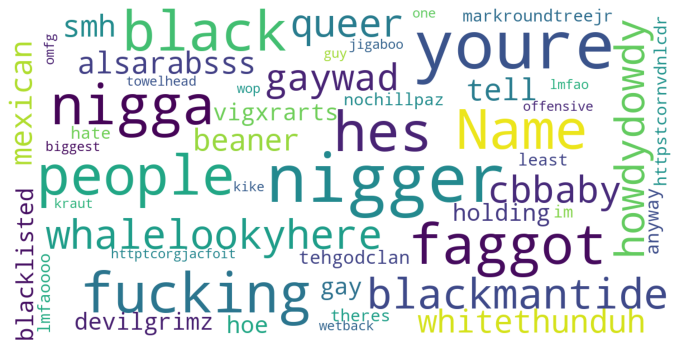

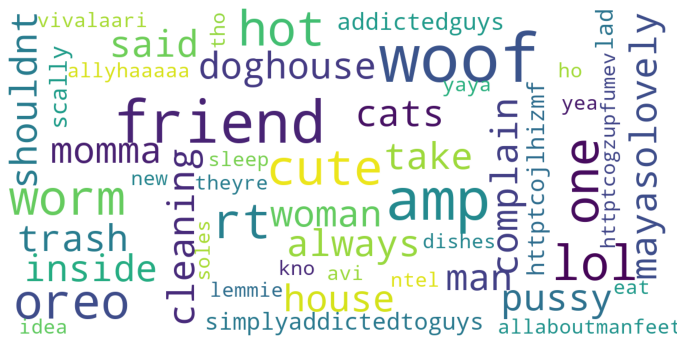

,class,tweet,word count,tokens
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy11 queer"" gaywad",5,"[blackmantide, whalelookyhere, howdydowdy, queer, gaywad]"
90,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a beaner smh you can tell hes a mexican",13,"[cbbaby, whitethunduh, alsarabsss, hes, beaner, smh, tell, hes, mexican]"
111,0,"""@DevilGrimz: @VigxRArts you're fucking gay, blacklisted hoe"" Holding out for #TehGodClan anyway...",13,"[devilgrimz, vigxrarts, youre, fucking, gay, blacklisted, hoe, holding, tehgodclan, anyway, http..."
186,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPLE https://t.co/RNvD2nLCDR"" This is why there's bla...",15,"[markroundtreejr, lmfaoooo, hate, black, people, httpstcornvdnlcdr, theres, black, people, niggers]"
204,0,"""@NoChillPaz: ""At least I'm not a nigger"" http://t.co/RGJa7CfoiT""\n\nLmfao",9,"[nochillpaz, least, im, nigger, httptcorgjacfoit, lmfao]"
...,...,...,...,...
25084,0,this guy is the biggest faggot omfg,7,"[guy, biggest, faggot, omfg]"
25197,0,"which one of these names is more offensive kike, wop, kraut, wetback jigaboo, towelhead, gook, o...",17,"[one, names, offensive, kike, wop, kraut, wetback, jigaboo, towelhead, gook, redskin]"
25264,0,you a pussy ass nigga and I know it nigga.,10,"[pussy, ass, nigga, know, nigga]"
25289,0,you're all niggers,3,"[youre, niggers]"


In [35]:
stopwords = set(STOPWORDS)
dfhateful = df[df["class"] == 0]
dfnonhateful = df[df["class"] == 2]

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(dfhateful['tokens'])
show_wordcloud(dfnonhateful['tokens'])

In [ ]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Start with one review:
df_hateful = df[df['class']==0]
df_nonhateful = df[df['class']==2]
tweet_All = " ".join(review for review in df.messages_bow)
tweet_hateful = " ".join(review for review in df_hateful.messages_bow)
tweet_nonhateful = " ".join(review for review in df_nonhateful.messages_bowa)

fig, ax = plt.subplots(4, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_hateful = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_hateful)
wordcloud_nonhateful = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_nonhateful)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_hateful, interpolation='bilinear')
ax[1].set_title('Tweets Hateful contents',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_nonhateful, interpolation='bilinear')
ax[2].set_title('Tweets non-hateful contents',fontsize=30)
ax[2].axis('off')

## IDTif 
* weight of words depending on the frequency of their appearence based on the BoW

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
# example of vectorized text from the previous BoW and IDTiF
tfidf_sample = tfidf_transformer.transform(bow_sample)
print(tfidf_sample)

In [ ]:
# to transform the entire bag-of-words corpus
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

# Models

## 1. Split 

### Split for tweets with BoW and TFIDF

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_tfidf, df['class'], test_size=0.2)

### Split for tweets only BoW

In [ ]:
df2 = df.copy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(messages_bow, df2['class'], test_size=0.2)

### Other pre-processing (if we decide the novelty to be pre-processing of tweets)

In [ ]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(word_tokens, df3['class'], test_size=0.2)

## 2. Import models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

### Logistic regression

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predict_log = log_reg.predict(X_test)
acc_LR = accuracy_score(y_test, predict_log)
acc_LR

In [ ]:
confusion_matrix(y_test, predict_log)

In [ ]:
log_reg2 = LogisticRegression()
log_reg2.fit(X_train2, y_train2)
predict_log2 = log_reg2.predict(X_test2)
acc_LR2 = accuracy_score(y_test2, predict_log2)

In [ ]:
acc_LR2

### Naives Bayes

In [ ]:
NB_reg = MultinomialNB()
NB_reg.fit(X_train, y_train)
predict_NB = log_reg.predict(X_test)
acc_NB = accuracy_score(y_test, predict_NB)

In [ ]:
NB_reg2 = MultinomialNB()
NB_reg2.fit(X_train2, y_train2)
predict_NB2 = log_reg.predict(X_test2)
acc_NB2 = accuracy_score(y_test2, predict_NB2)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
predict = rand_clf.predict(X_test)
acc_RF = accuracy_score(y_test, predict)

In [ ]:
rand_clf2 = RandomForestClassifier()
rand_clf2.fit(X_train2, y_train2)
predict2 = rand_clf2.predict(X_test2)
acc_RF2 = accuracy_score(y_test2, predict2)

In [ ]:
confusion_matrix(y_test, predict)

### Decision Tree

In [ ]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
predict_dt = dt_clf.predict(X_test)
acc_DT = accuracy_score(y_test, predict_dt)

In [ ]:
confusion_matrix(y_test, predict_dt)

In [ ]:
dt_clf2 = tree.DecisionTreeClassifier()
dt_clf2.fit(X_train2, y_train2)
predict_dt2 = dt_clf2.predict(X_test2)
acc_DT2 = accuracy_score(y_test2, predict_dt2)

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
predict_grad = grad_clf.predict(X_test)
acc_GBC = accuracy_score(y_test, predict_grad)

In [ ]:
grad_clf2 = GradientBoostingClassifier()
grad_clf2.fit(X_train2, y_train2)
predict_grad2 = grad_clf2.predict(X_test2)
acc_GBC2 = accuracy_score(y_test2, predict_grad2)

In [ ]:
confusion_matrix(y_test, predict_grad)

### SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(X_train, y_train)
predict_svc =  svc.predict(X_test)
acc_SVC = accuracy_score(y_test, predict_svc)

In [ ]:
acc_SVC

In [ ]:
from sklearn.svm import SVC
svc2 = SVC(kernel = 'rbf')
svc2.fit(X_train2, y_train2)
predict_svc2 =  svc.predict(X_test2)
acc_SVC2 = accuracy_score(y_test2, predict_svc2)

## 3.Evaluation of the different models

In [ ]:
# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Regression', 'Naive Bayes','Random Forest','Decision Tree','Gradient Boosting Classifier','SVM','Logistic Regression', 'Naive Bayes','Random Forest','Decision Tree','Gradient Boosting Classifier','SVM'], 'Features' : ['Both','Both','Both','Both','Both','Both','BoW','BoW','BoW','BoW','BoW','BoW'],
    'Accuracy Scores': [acc_LR, acc_NB,acc_RF,acc_DT,acc_GBC, acc_SVC, acc_LR2,acc_NB2,acc_RF2,acc_DT2,acc_GBC2,acc_SVC2]}

result_df = pd.DataFrame(data=d)
result_df